# COGS 118A - Final Project


## Group members

- Neil Bajaj
- Ria Singh
- Pratheek Sankeshi 
- Shenova Davis

# Abstract 
The goal of this project is to predict whether to approve a credit card for an applicant based on a variety of factors that were asked on their application. We will predict using a machine learning algorithm. The data we will be using is from the Kaggle dataset: A Credit Card Dataset for Machine Learning. The link is https://www.kaggle.com/datasets/caesarmario/application-data/. We will be using factors such as Total Income, Education Type, Applicant Age, etc. More will be described in the data section. Furthermore, we will drop unnecessary columns like Owned Phone, Owned Email, etc while also replacing null values to perform EDA. We will then run various supervised machine learning algorithms to create models to predict the data and use the best one. The performance will be measured on how accurately we predict the data against the status column of the data which is whether the application was approved or not. 


__NB:__ this final project form is much more report-like than the proposal and the checkpoint. Think in terms of writing a paper with bits of code in the middle to make the plots/tables

# Background

As we get deeper into the age of Big Data, we see that, where possible, we are attempting to move from human evaluation to machine learning prediction. There has also been an uptick in the number of credit card defaulters. Using this logic, credit card companies need a new way to decide whether or not to approve credit cards based on prior history. 

A previous study done by Dr. Hemkiran[1] evaluated whether applicants should be approved for a credit card by using a Logistic Regression with and without a grid search technique. They found that using a grid search technique improved the competency of their model. Additionally, they also used an Artificial Neural Network (ANN) and found it to be better than the linear regression model. Another study by Dr. Kibria[2] aimed to create a deep learning model to aid credit card approval decision-making. They also used a logistic regression model and a support vector machine (SVM) model to compare their results. They found that the deep learning model was better than the logistic regression and SVM models. However, the ANN model and deep learning model are more computationally expensive and time-consuming. 

We are attempting to create a predictive machine learning model that models whether or not the application has the right credentials to have their credit card application approved using the following variables: Applicant Gender, Owned property, Total Children, Owned Car, Total Income, Housing Type, Total Family Members, Applicant Age, Education Type, Good Debt, Bad Debt, and Family Status. This is to avoid future credit card defaulters. We will use models such as Naive Bayes Classifier, Linear SVM, and Linear Regression and use them to compare our model’s performance as well. 


# Problem Statement

We are building this model to measure if there are any discrepancies when approving credit card applications. We additionally want to check if we could use big data and machine learning to build a model that predicts if a credit card is approved or not. This would take out human bias from the equation and make sure every application is fairly reviewed. Creating a machine learning model will attempt to eliminate the human bias towards race, class, gender, etc - an issue that plagues the financial ratings of individuals. Additionally, a machine-learning system can significantly reduce the human power and costs of a credit card company, increasing revenue. If our model can accurately predict whether an application can be accepted, we could conclude our hypothesis. This problem is quantifiable since we are trying to model a binary predictor. This problem is measurable because we would be using the metric of accuracy to validate the performance of our model. Lastly, our model is replicable because we could run it on different datasets and check its accuracy on each dataset. The model we will create will be composed of supervised machine-learning algorithms and techniques such as logistic regression, linear SVM, K fold validation, etc. We will train our model on previously collected data from credit card companies to understand what attributes make an individual more or less likely to get approved for a credit card. 

# Data

- Link for our data: https://www.kaggle.com/datasets/caesarmario/application-data

- This data set has about 25,100 observations with 21 variables. 

- The variables that will be used are Applicant Gender, Owned property, Total Children, Owned Car, Total Income, Housing Type, Total Family Members, Applicant Age, Education Type,Family Status, Total Good Debt, and Total Bad Debt. 

- The dataset we are using has already been cleaned to drop any data points with null values and yet the dataset remains robust so we will not be addressing it any further.

- We will additionally drop all the features that we will not be using to further declutter the dataset.

- In addition to cleaning we one hot encoded all other categorical data which wasn't already binary which is displayed below





In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns    
from matplotlib.pyplot import figure
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#models importing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 

#linear svm
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.kernel_ridge import KernelRidge

credit  = pd.read_csv('Application_Data.csv')

#Keeping only the columns we intend on using along with the status 
#column which contains the true status of the applicant

credit = credit[["Applicant_Gender", "Applicant_Age","Owned_Realty",
                 "Total_Children", "Owned_Car", "Total_Income", "Housing_Type",
                 "Total_Family_Members", "Education_Type", "Family_Status", 'Status', 'Total_Bad_Debt', 'Total_Good_Debt']]

In [2]:
credit.head()

Applicant_Gender  Applicant_Age  Owned_Realty  Total_Children  Owned_Car  \
0          M                   59             1               0          1   
1          F                   53             1               0          0   
2          F                   53             1               0          0   
3          F                   53             1               0          0   
4          F                   53             1               0          0   

   Total_Income                                       Housing_Type  \
0        112500  House / apartment                             ...   
1        270000  House / apartment                             ...   
2        270000  House / apartment                             ...   
3        270000  House / apartment                             ...   
4        270000  House / apartment                             ...   

   Total_Family_Members                                     Education_Type  \
0                     2  Secondary / secondary special                 ...   
1                     1  Secondary / secondary special                 ...   
2                     1  Secondary / secondary special                 ...   
3                     1  Secondary / secondary special                 ...   
4                     1  Secondary / secondary special                 ...   

                                       Family_Status  Status  Total_Bad_Debt  \
0  Married                                       ...       1               0   
1  Single / not married                          ...       1               0   
2  Single / not married                          ...       1               0   
3  Single / not married                          ...       1               0   
4  Single / not married                          ...       1               0   

   Total_Good_Debt  
0               30  
1                5  
2                5  
3               27  
4               39

### One Hot Encoding and SMOTE

While doing the initial EDA, we realised that our dataset only had 0.4% negative class. To rectify this discrepancy, we used SMOTE to generate data such that the data is split at an even 50% - similar to actual credit card approval rates. However, before running SMOTE we need to One Hot Encode our data.

Before One Hot Encoding, we check for null or NAN values - as seen below our dataset doesn't have any hence handling them is not required.

In [3]:
credit.isnull().values.any()

False

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(credit.drop('Status', axis=1), #
                                                    credit['Status'], #Y variable target
                                                    train_size=0.8,
                                                    random_state=123)

categorical_features = ["Applicant_Gender", "Housing_Type", "Education_Type", "Family_Status"]


# Define numerical and categorical column selectors
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

# Get numerical and categorical column names
numerical_columns = numerical_columns_selector(X_train)
categorical_columns = categorical_columns_selector(X_train)

# Define one-hot encoder and scaler
numerical_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(drop='first')  # drop original categorical features, could combine with if binary
#but unnecessary

#creating a preprocessor to add to the pipeline maybe combine this cell into one?
preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

### Running Smote

The data generation results in the total number of data points increasing from 25,000 to 45,000.

In [5]:
from imblearn.over_sampling import SMOTE

X_train_processed = preprocessor.fit_transform(X_train)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train_processed, y_train)

Doing some additional data cleaning

In [6]:

num_columns = list(numerical_columns)

preprocessor.fit(X_train)

#cat_columns = list(categorical_transformer.get_feature_names_out(categorical_columns))
cat_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
column_names = num_columns + cat_columns
column_names = num_columns + cat_columns

X_res_df = pd.DataFrame(X_res, columns=column_names)

In [7]:
X_res_df['Total_Income'].describe()

count    40004.000000
mean        -0.041293
std          1.006789
min         -1.630637
25%         -0.660573
50%         -0.315613
75%          0.299036
max         13.455899
Name: Total_Income, dtype: float64

In [8]:
X_train['Total_Income'].describe()

count    2.010200e+04
mean     1.943165e+05
std      1.026106e+05
min      2.700000e+04
25%      1.350000e+05
50%      1.800000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Total_Income, dtype: float64

## Test data processing

In [9]:
#X TEST
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)


numerical_columns = numerical_columns_selector(X_test)
categorical_columns = categorical_columns_selector(X_test)


numerical_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(drop='first')  


preprocessor = ColumnTransformer(
    transformers=[ 
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

In [10]:
X_test_processed = preprocessor.fit_transform(X_test)

In [11]:
num_columns = list(numerical_columns)

preprocessor.fit(X_test)

cat_columns = list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))
column_names = num_columns + cat_columns
column_names = num_columns + cat_columns

X_test_df = pd.DataFrame(X_test_processed, columns=column_names)

The reason why the standardized training data and the original training data look different and transformed is due to standard scaling. We used standard scaling for a few reasons.

First, it aids in the normalization of the data by transforming the data to have no mean and unit variance, which is helpful for data with different measurement units and magnitudes. Additionally, it improves the perfomance of some machine learning algorithms such as K-Nearest Neighbors and Support Vector Machines, because they are sensitive to the scale of the input. Standard scaling also helps optimization algorithms, such as gradient descent, converge faster when the features are on the same scaled. Lastly, when performing a models with coefficients, such as linear regression, standard scaling ensures that the coefficients are compared fairly. Overall, standard scaling is a common preprocessing step that can improve the performance of many machine learning models and make the interpretation of results easier by having features on the same scale.

This concludes our data cleaning process and make the data ready to be used in our models

# Proposed Solution

Our proposed solution to predicting whether individuals get approved for a credit card and understanding what variables play a role in making that decision is to use classifiers based on the techniques we’ve learnt in class. 
First, we will use k-fold validation to determine our model of choice by validating over logistic classifiers/ regression, naive Bayes, Linear SVM, kernel ridge regression with l1, l2, and elastic net penalty. We will choose the model that gives us the highest accuracy score. 

We are using K-fold validation since with the train-validation-test model split we always run the issue of overfitting on the training data. K-fold validation instead trains and evaluates on all available data by splitting the data amongst each fold training on that and testing on the rest. 

We are using logistic classifiers/ regression, naive Bayes, Linear SVM, and kernel ridge regression since they are machine learning classifiers. Our proposed problem is to predict whether to approve a credit card for an applicant based on a variety of factors that were asked on their application. This is a yes or no question which makes it a binary classification task. As a result, it makes a lot of sense to use machine learning classification algorithms that can also be used to solve binary classification problems like the algorithms above. We are using these specific algorithms since we are familiar with these algorithms and understand how to run and evaluate them effectively. Furthermore, we use L1, L2, and elasticnet penalty on kernel ridge regression since these are regularization terms that will curb overfitting and make generalization better. 

With the chosen model we will validate across parameters. In the case of logistic regression, we will validate over the values of C = [0.01, 0.1, 1, 10, 100] to find our best model. 
For Naive Bayes, we will validate over Gaussian Naive Bayes and Multinomial Naive Bayes and choose our alpha from the following values - [0.01,0.05, 0.1, 0.2, 0.25].

For Linear SVM, we will validate over different kernel functions - 'linear', 'poly', 'rbf', and 'sigmoid' and we will choose over values of C = [0.01, 0.1, 1, 10, 100] to find the best model. 

For Kernel Ridge, we will validate over the following values of alpha - [0.01, 0.1, 1.0, 10.0, 100.0], the kernel functions of linear, polynomial, and RBF and related kernel-specific parameters.

Our extensive search over the models and their parameters will make our classification model accurate. As our dataset is not super large, we are not as concerned about computational efficiency - something to improve on while expanding on the project. 

We will finally train our model and test it to see its accuracy and compare it to existing models available on Kaggle to compare our performance. We will set up a confusion matrix to see how the model fares and plot the ROC/AUC. 


# Evaluation Metrics

We will use both precision and recall metrics to evaluate our model as both false negatives and false positives are of significant concern to our model. A credit card company would need to maximize eligible customers to increase revenue by minimizing the number of false negatives and also would need to minimize the number of individuals who may default to cut losses hence minimizing the false positives. Since neither one of the metrics is more important to our model, we will additionally use the f1 score which incorporates both precision and recall to finally measure the performance of our model. 
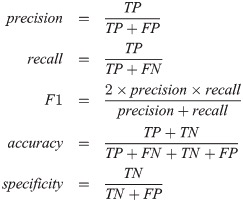

# Results

After cleaning and balancing our dataset,we proceed to train and validate our data on the training set using reapeated KFold crossvalidation where K = 5.


**Note: All of our code is run in other notebooks which are available for viewing in our GitHub Repository.**

Below is the baseline model we created where applicants with income higher than median income of the dataset get approved for the credit card.

In [12]:
train_income_mean = X_train['Total_Income'].mean()
print(train_income_mean)

Baseline = [1 if i >= train_income_mean else 0 for i in X_train['Total_Income']]
X_train['prediction'] = Baseline


y_true_num = list(y_train)
y_pred_num = list(X_train['prediction'])

fp = 0
tp = 0
fn = 0
tn = 0

tpPoints = []
xTp = []
fpPoints = []
xFp = []
fnPoints = []
xFn = []
tnPoints = []
xTn = []

for i in range (len(y_true_num)):
    if y_true_num[i] == 1 and y_pred_num[i] == 1:
        tp += 1
        tpPoints.append(credit['Total_Income'].iloc[i])
        xTp.append(i)
        #tpPoints.append(credits['Total_Income'][i]) #fix this doesnt make sense
    if y_true_num[i] == 0 and y_pred_num[i] == 1:
        fp += 1
        fpPoints.append(credit['Total_Income'].iloc[i])
        xFp.append(i)
        #fpPoints.append(y_true_)
    if y_true_num[i] == 1 and y_pred_num[i] == 0:
        fn += 1
        fnPoints.append(credit['Total_Income'].iloc[i])
        xFn.append(i)
    if y_true_num[i] == 0 and y_pred_num[i] == 0:
        tn += 1
        tnPoints.append(credit['Total_Income'].iloc[i])
        xTn.append(i)
        

precision = float (tp) / float(tp + fp)
recall = float(tp) / float(tp + fn)
       
print("Precision: ", precision)
print()
print("Recall: ", recall)
print()
print("False Positive: ", fp)
print()
print("False Negative: ", fn)
print()
f1 = 2*precision *recall / (precision + recall)
print("F1 Score: ", f1)

194316.49268729478
Precision:  0.9950829748002459

Recall:  0.4047095290470953

False Positive:  40

False Negative:  11907

F1 Score:  0.5753989408963287


### Classifier 1 - Logistic Classifier

#### Finding our best model 

The first model we use is a Logistic classfier as it is one of the simplest and most efficient models. The three hyperparameters we try to optimize over are the different kind of solvers,different penalties, and different regularization values.

Different solvers use different alogorithms to find the optimal weights and perform better on different sizes of data. They are also compatible with certain penalities hence gridsearching across them is important to determine our best accuracy wiuthi the logistic classifier model.

The different penalities use and regularization values help avoid overfitting

### Grid search

Below are the screenshots of the Gridsearch for our logistic classifier over the hyperparameters

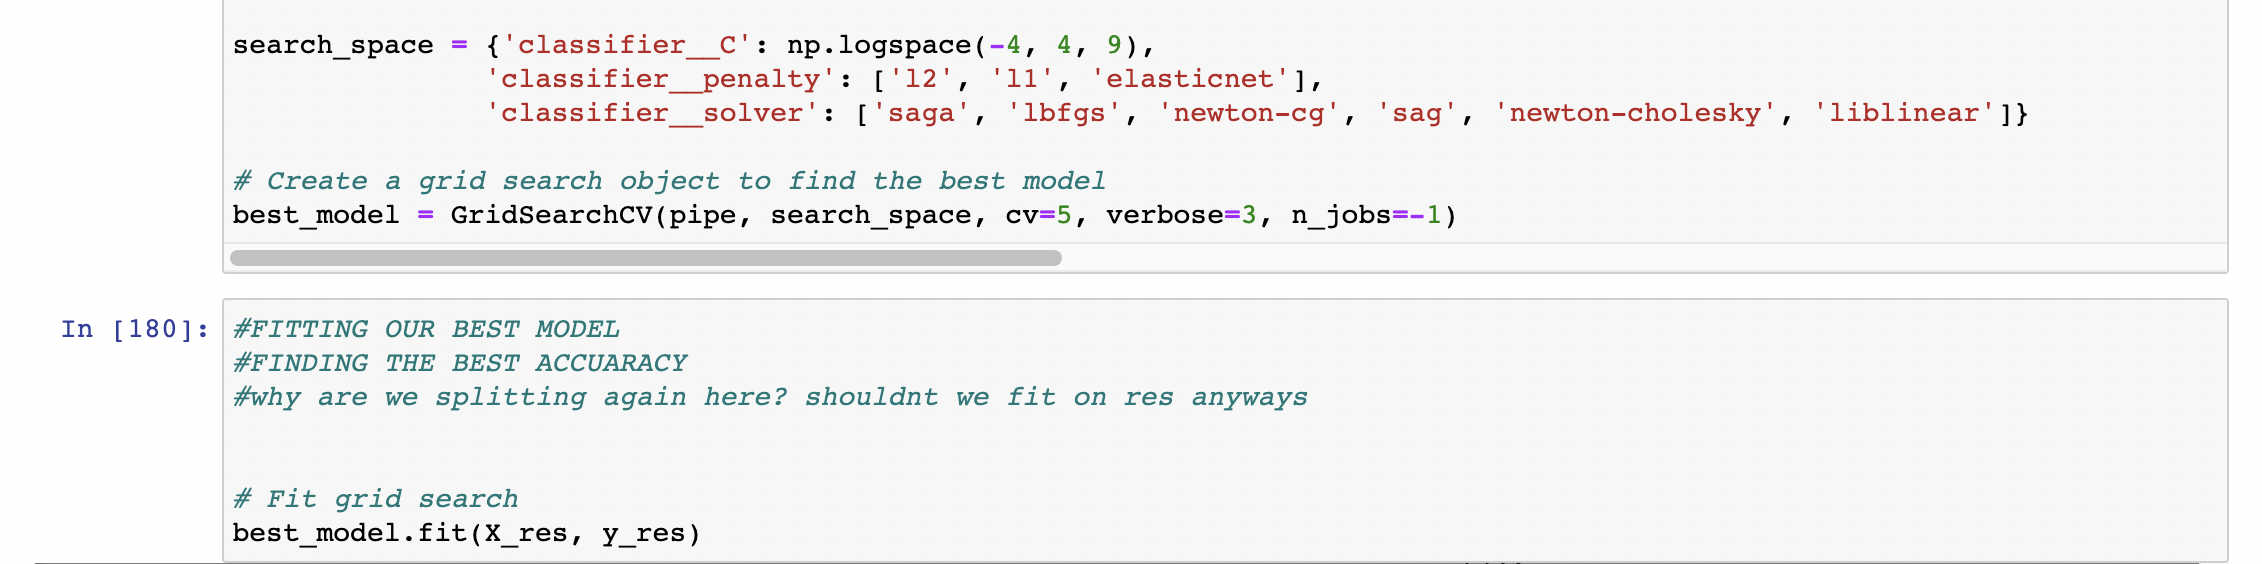

The gridsearch resulted in a best model with its parameters given below

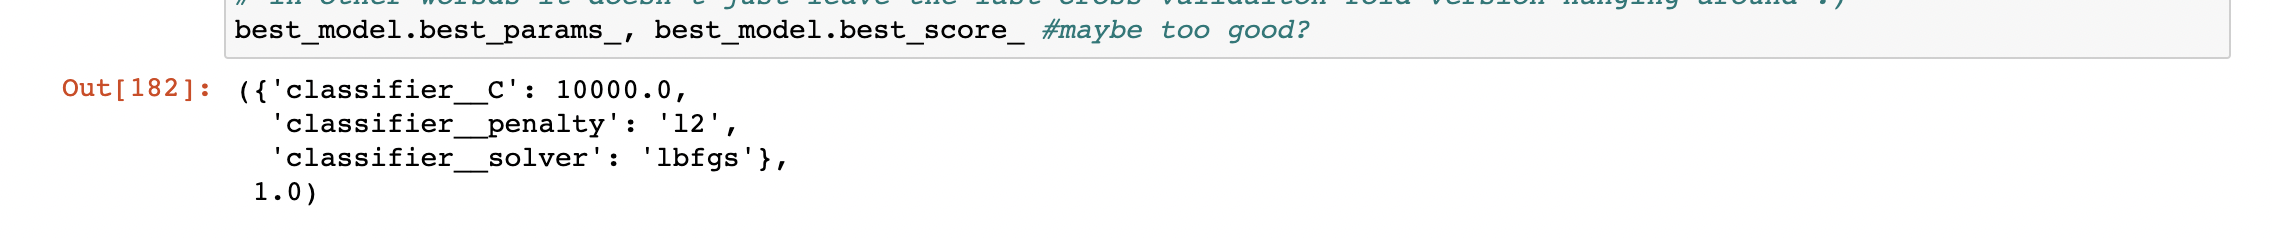

In [13]:
#LOGISTIC REGRESSION BEST MODEL AND ACCURACY SCORE
clf = LogisticRegression(solver ='lbfgs',random_state=42, C = 10000,penalty = "l2").fit(X_res, y_res)
score = clf.score(X_test_df, y_test)
print(score)

0.9972144846796658


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Next we for each of the classifiers we will show the confusion matrix and the AUC curve

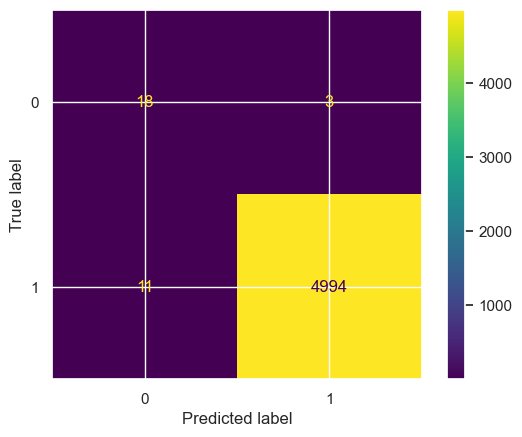

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_test = clf.predict(X_test_processed)
#print(len(y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)

# the text version takes the true labels 
# and the predictions AND THE ORDER OF ARGUMENTS MATTERS!!
# don't mess it up

disp = ConfusionMatrixDisplay(cm);
disp.plot()

Defining the Area Under the Curve for the ROC curve which is the Reciever Operator Characteristic (ROC) characterizes binary classifiers by plotting the false positive rate against the false positive rate. This is a good way to determine how the model is performing.

In [15]:
def my_auc(fps, tps):
    """my_auc computes the AUC of ROC. Feel free to convert these to numpy arrays.
    Arguments:
        fps: List[float] - x values
            false positive rates
        tps: List[float] - y values
            true positive rates
    Returns:
        float
        the area under the ROC curve
    """
    #also easy to create urself
    return metrics.auc(fps, tps)

Calculating the true positive and false positives

In [16]:
# hint use classifier_model.decision_function(X_test_bcw) to get prediction scores
scores = clf.predict_proba(X_test_processed)[:,1]
print(scores)
fps = []
tps = []
for threshold in np.linspace(0,1,1000):
    y_pred = scores > threshold
    #true_positives, false_positives, true_negatives, false_negatives = classifier_model.decision_function(y_pred)
    
    #x = classifier_model.decision_function(y_pred)
    # Step 1: Compute the confusion matrix
    (true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_test, y_pred).ravel()
    
    #(true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_train_bcw, y_pred).ravel()
    # Step 2: Compute the TP and FP 
    # and append it to fps and tps
    fps.append((false_positives)/(false_positives + true_negatives))
    tps.append((true_positives)/(true_positives + false_negatives))

[1. 1. 1. ... 1. 1. 1.]


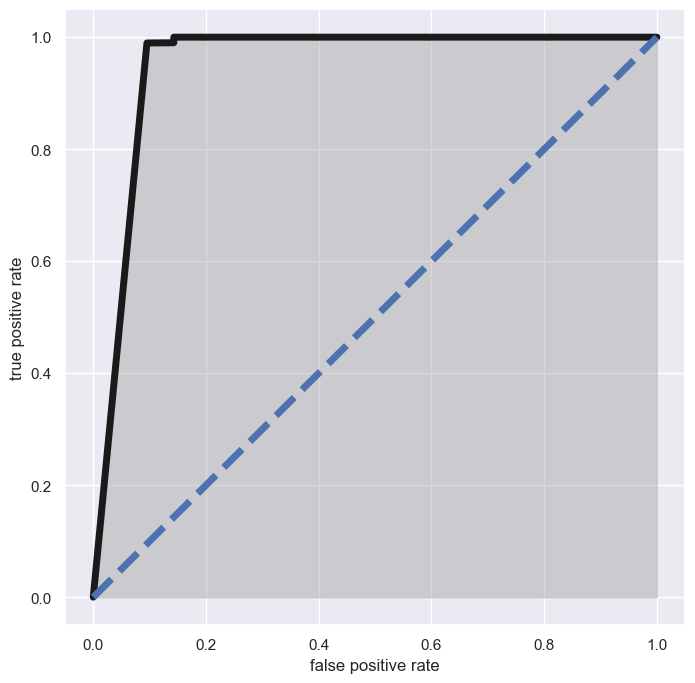

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");

### Classifier 2 - SVM

Our second model is SVM where we optimize over three hyperparameters whic are regularization strength, kernel, and value of gamma.

The different kernels are used for different datashapes to help linearly seperate then.

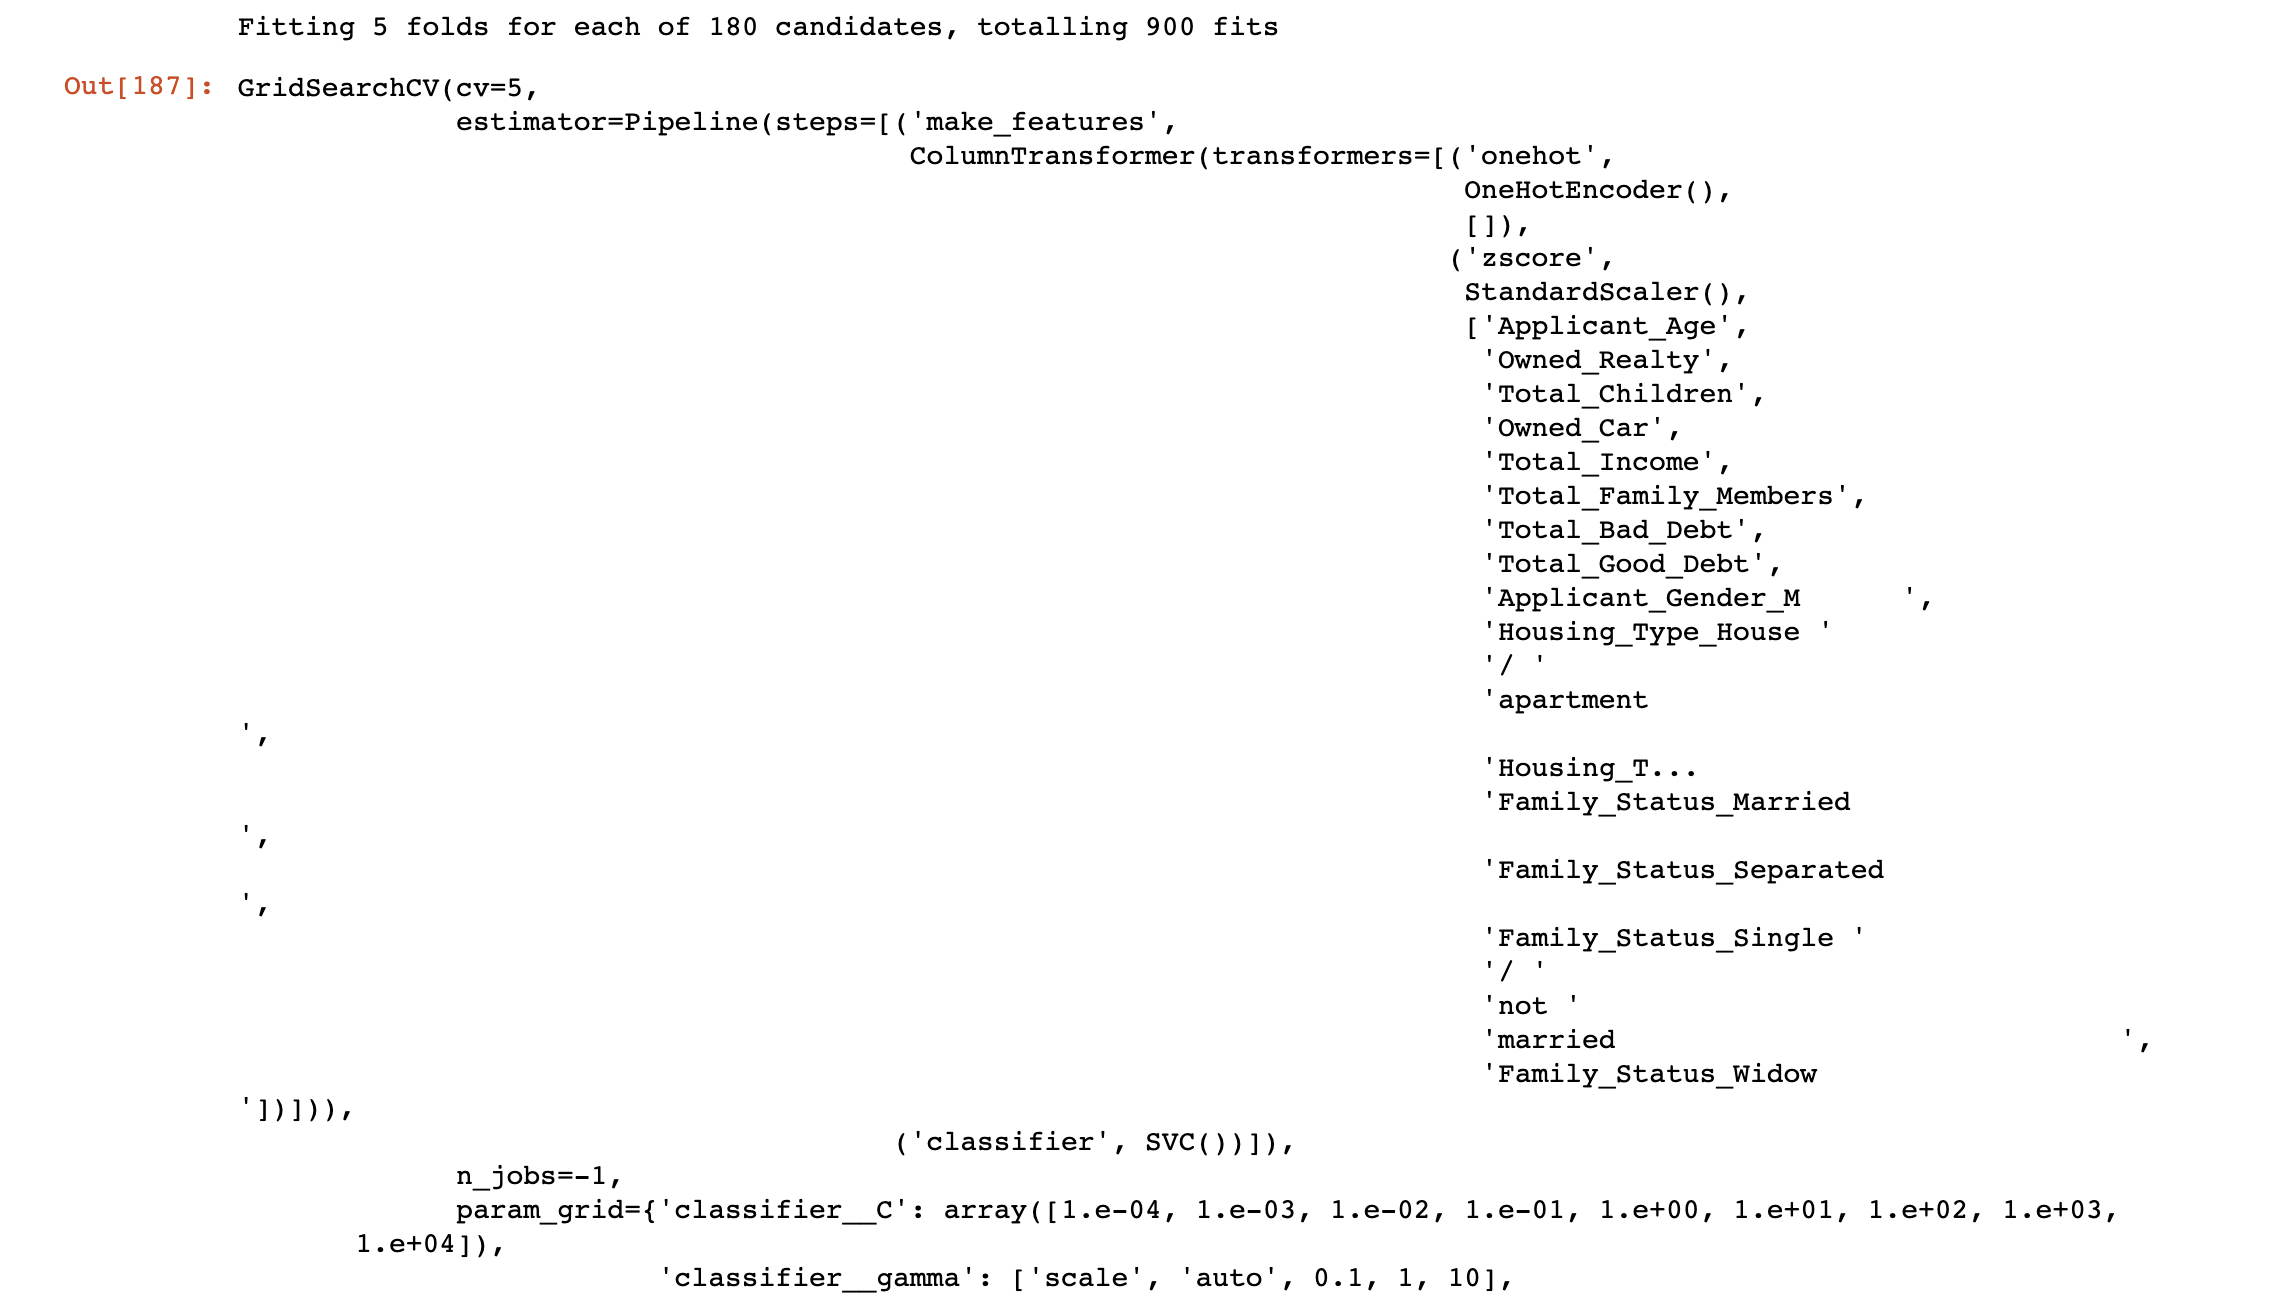

The code screenshot below shows the best model and its hyperparamters as outputted by Gridsearch 

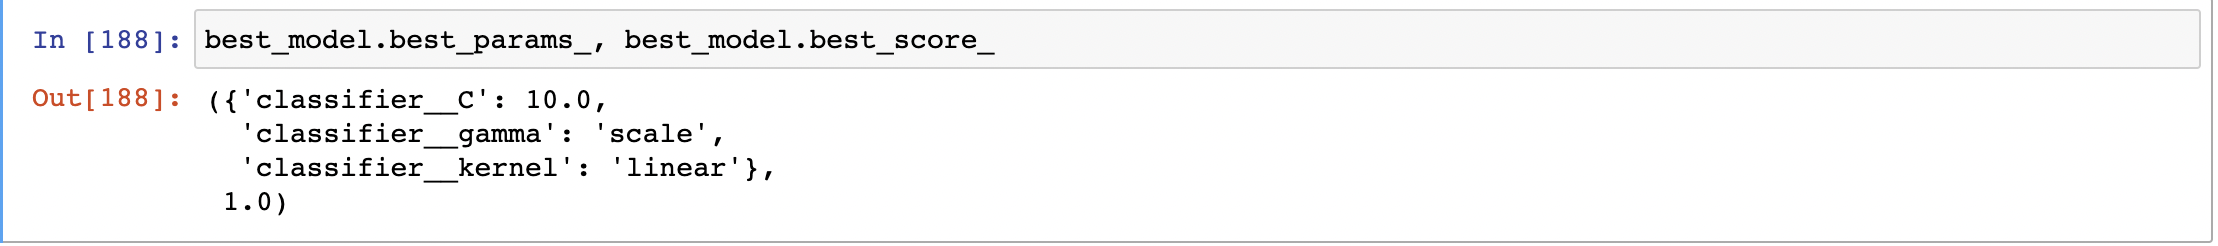

In [49]:
#BEST SVC CLASSIFIER AND ACCURACY SCORE
model = SVC(C = 10, kernel = 'linear', gamma = 'scale')
model.fit(X_res, y_res)
model.score(X_test_df,y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


0.9994031038599284

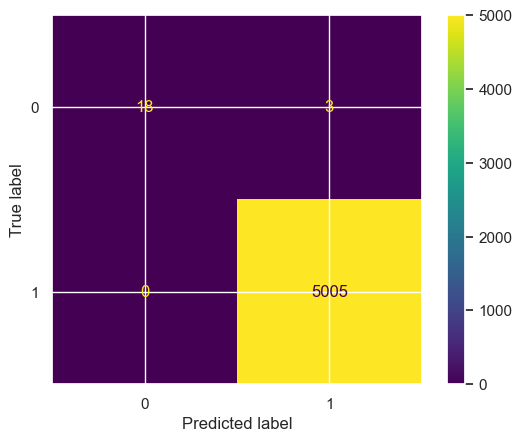

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_test = model.predict(X_test_processed)
#print(len(y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)

# the text version takes the true labels 
# and the predictions AND THE ORDER OF ARGUMENTS MATTERS!!
# don't mess it up

disp = ConfusionMatrixDisplay(cm);
disp.plot()

In [51]:
# hint use classifier_model.decision_function(X_test_bcw) to get prediction scores
scores = model.predict_proba(X_test_processed)[:,1]
print(scores)
fps = []
tps = []
for threshold in np.linspace(0,1,1000):
    y_pred = scores > threshold
    #true_positives, false_positives, true_negatives, false_negatives = classifier_model.decision_function(y_pred)
    
    #x = classifier_model.decision_function(y_pred)
    # Step 1: Compute the confusion matrix
    (true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_test, y_pred).ravel()
    
    #(true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_train_bcw, y_pred).ravel()
    # Step 2: Compute the TP and FP 
    # and append it to fps and tps
    fps.append((false_positives)/(false_positives + true_negatives))
    tps.append((true_positives)/(true_positives + false_negatives))

AttributeError: predict_proba is not available when  probability=False

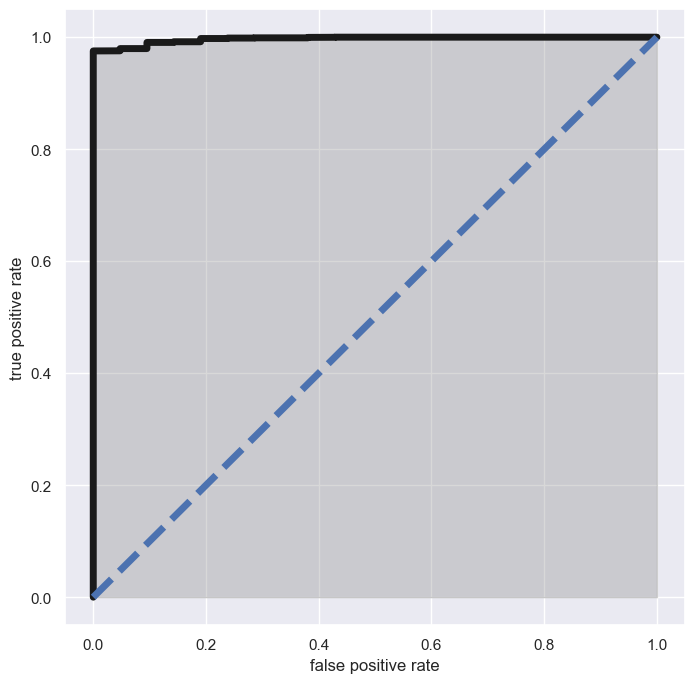

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");

### Classifier 3 - Naive Bayes

The third model we attempt to fit on is Naive Bayes. This model works on probabailistic reasoning by calculating condiitonal probabailties hence is pretty simple and computationally efficient for medium size datasets such as ours. 

Since Naive Bayes does not have any hyperparamters, this is the only model.

In [22]:
#Naive Bayes and the classifier's accuracy score
model = GaussianNB() #the only possible model for naivebayes
model.fit(X_res, y_res)
model.score(X_test_df, y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


0.8452049343414246

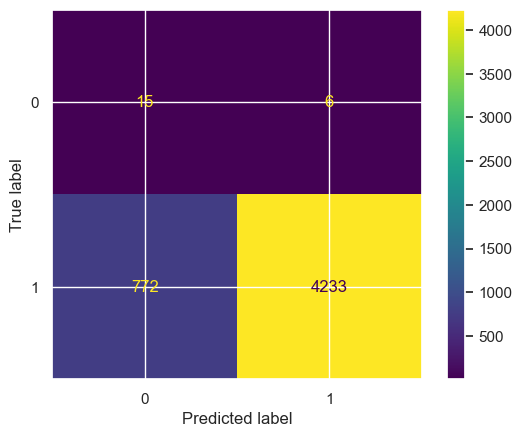

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_test = model.predict(X_test_processed)
#print(len(y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)

# the text version takes the true labels 
# and the predictions AND THE ORDER OF ARGUMENTS MATTERS!!
# don't mess it up

disp = ConfusionMatrixDisplay(cm);
disp.plot()

In [24]:
# hint use classifier_model.decision_function(X_test_bcw) to get prediction scores
scores = model.predict_proba(X_test_processed)[:,1]
print(scores)
fps = []
tps = []
for threshold in np.linspace(0,1,1000):
    y_pred = scores > threshold
    #true_positives, false_positives, true_negatives, false_negatives = classifier_model.decision_function(y_pred)
    
    #x = classifier_model.decision_function(y_pred)
    # Step 1: Compute the confusion matrix
    (true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_test, y_pred).ravel()
    
    #(true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_train_bcw, y_pred).ravel()
    # Step 2: Compute the TP and FP 
    # and append it to fps and tps
    fps.append((false_positives)/(false_positives + true_negatives))
    tps.append((true_positives)/(true_positives + false_negatives))

[1.         1.         1.         ... 0.98710959 1.         0.91160665]


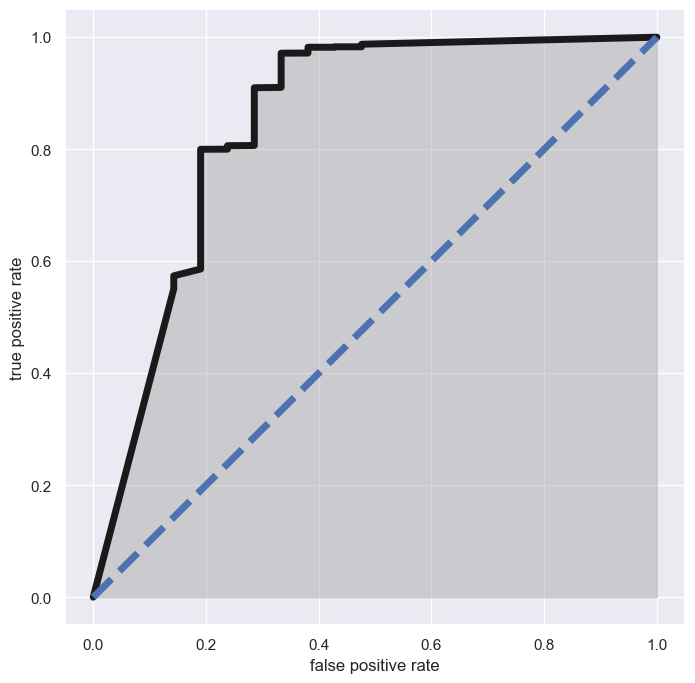

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");

### Classifier 4 - KNN

KNN, though a pretty reliable model is also computationally intensive and runs the risk of over fitting making gridsearch important to find an accurate model.

The K-Nearest Neighbours classifier is run on the following hyperparamters and the grid search results in a best model.

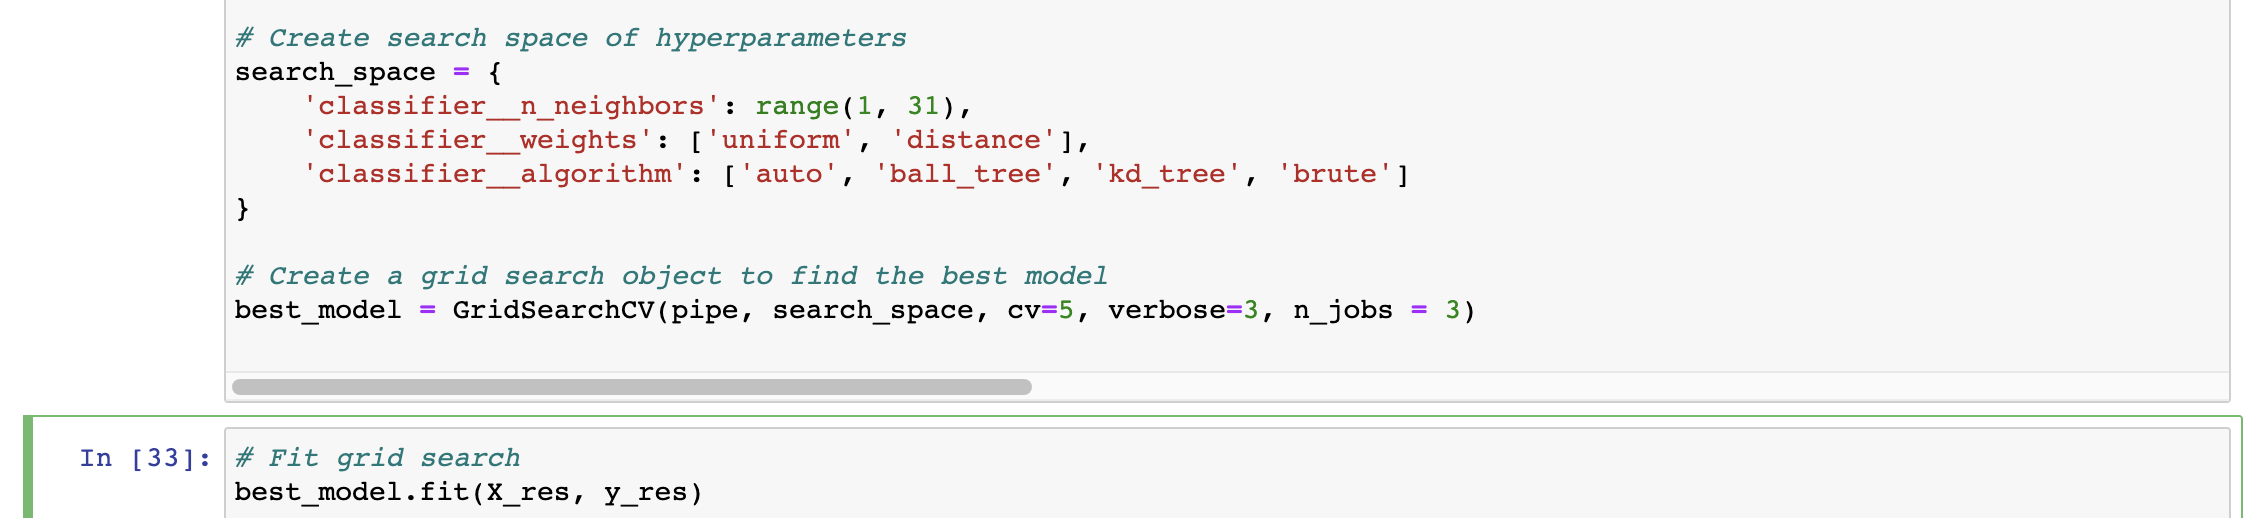

The following screenshot shows the best model as given by the gridsearch

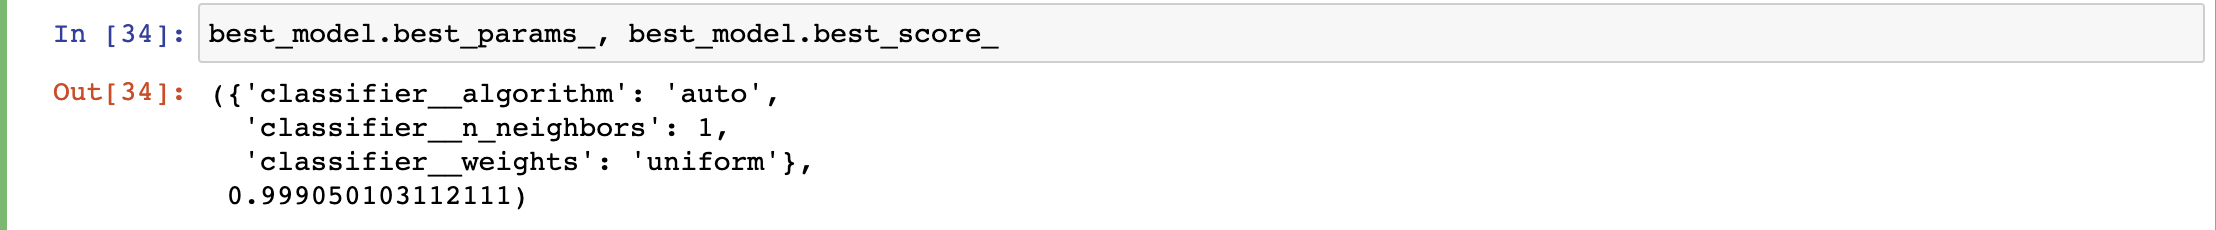

In [26]:
#KNN best classifier and its accuracy score
model = KNeighborsClassifier(algorithm ='auto',n_neighbors = 1,weights='uniform').fit(X_res,y_res)
model.score(X_test_df,y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.9958217270194986

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


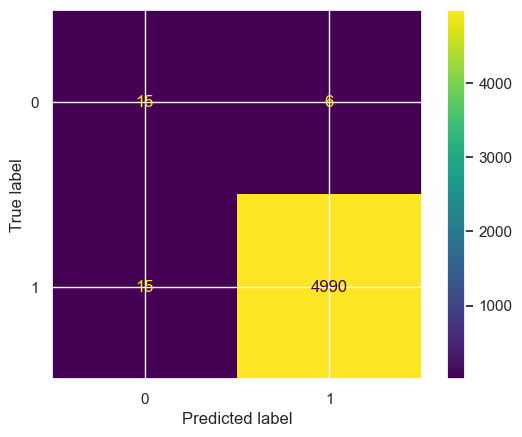

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_test = model.predict(X_test_processed)
#print(len(y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)

# the text version takes the true labels 
# and the predictions AND THE ORDER OF ARGUMENTS MATTERS!!
# don't mess it up

disp = ConfusionMatrixDisplay(cm);
disp.plot()

In [28]:
# hint use classifier_model.decision_function(X_test_bcw) to get prediction scores
scores = model.predict_proba(X_test_processed)[:,1]
print(scores)
fps = []
tps = []
for threshold in np.linspace(0,1,1000):
    y_pred = scores > threshold
    #true_positives, false_positives, true_negatives, false_negatives = classifier_model.decision_function(y_pred)
    
    #x = classifier_model.decision_function(y_pred)
    # Step 1: Compute the confusion matrix
    (true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_test, y_pred).ravel()
    
    #(true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_train_bcw, y_pred).ravel()
    # Step 2: Compute the TP and FP 
    # and append it to fps and tps
    fps.append((false_positives)/(false_positives + true_negatives))
    tps.append((true_positives)/(true_positives + false_negatives))

[1. 1. 1. ... 1. 1. 1.]


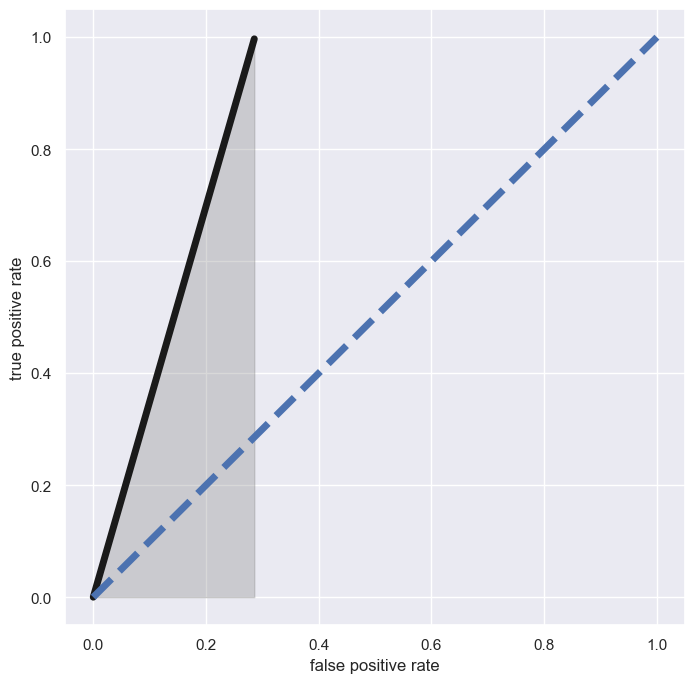

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");

### Classifier 5 - Decision Tree

Decision trees are another important, accurate yet computationally intensive model that are prone to overfitting making gridsearch crucial for it. 

We ran a gridsearch over the decision criterion, maximum depth, minimum sample splits, and minimum sample leaves. 

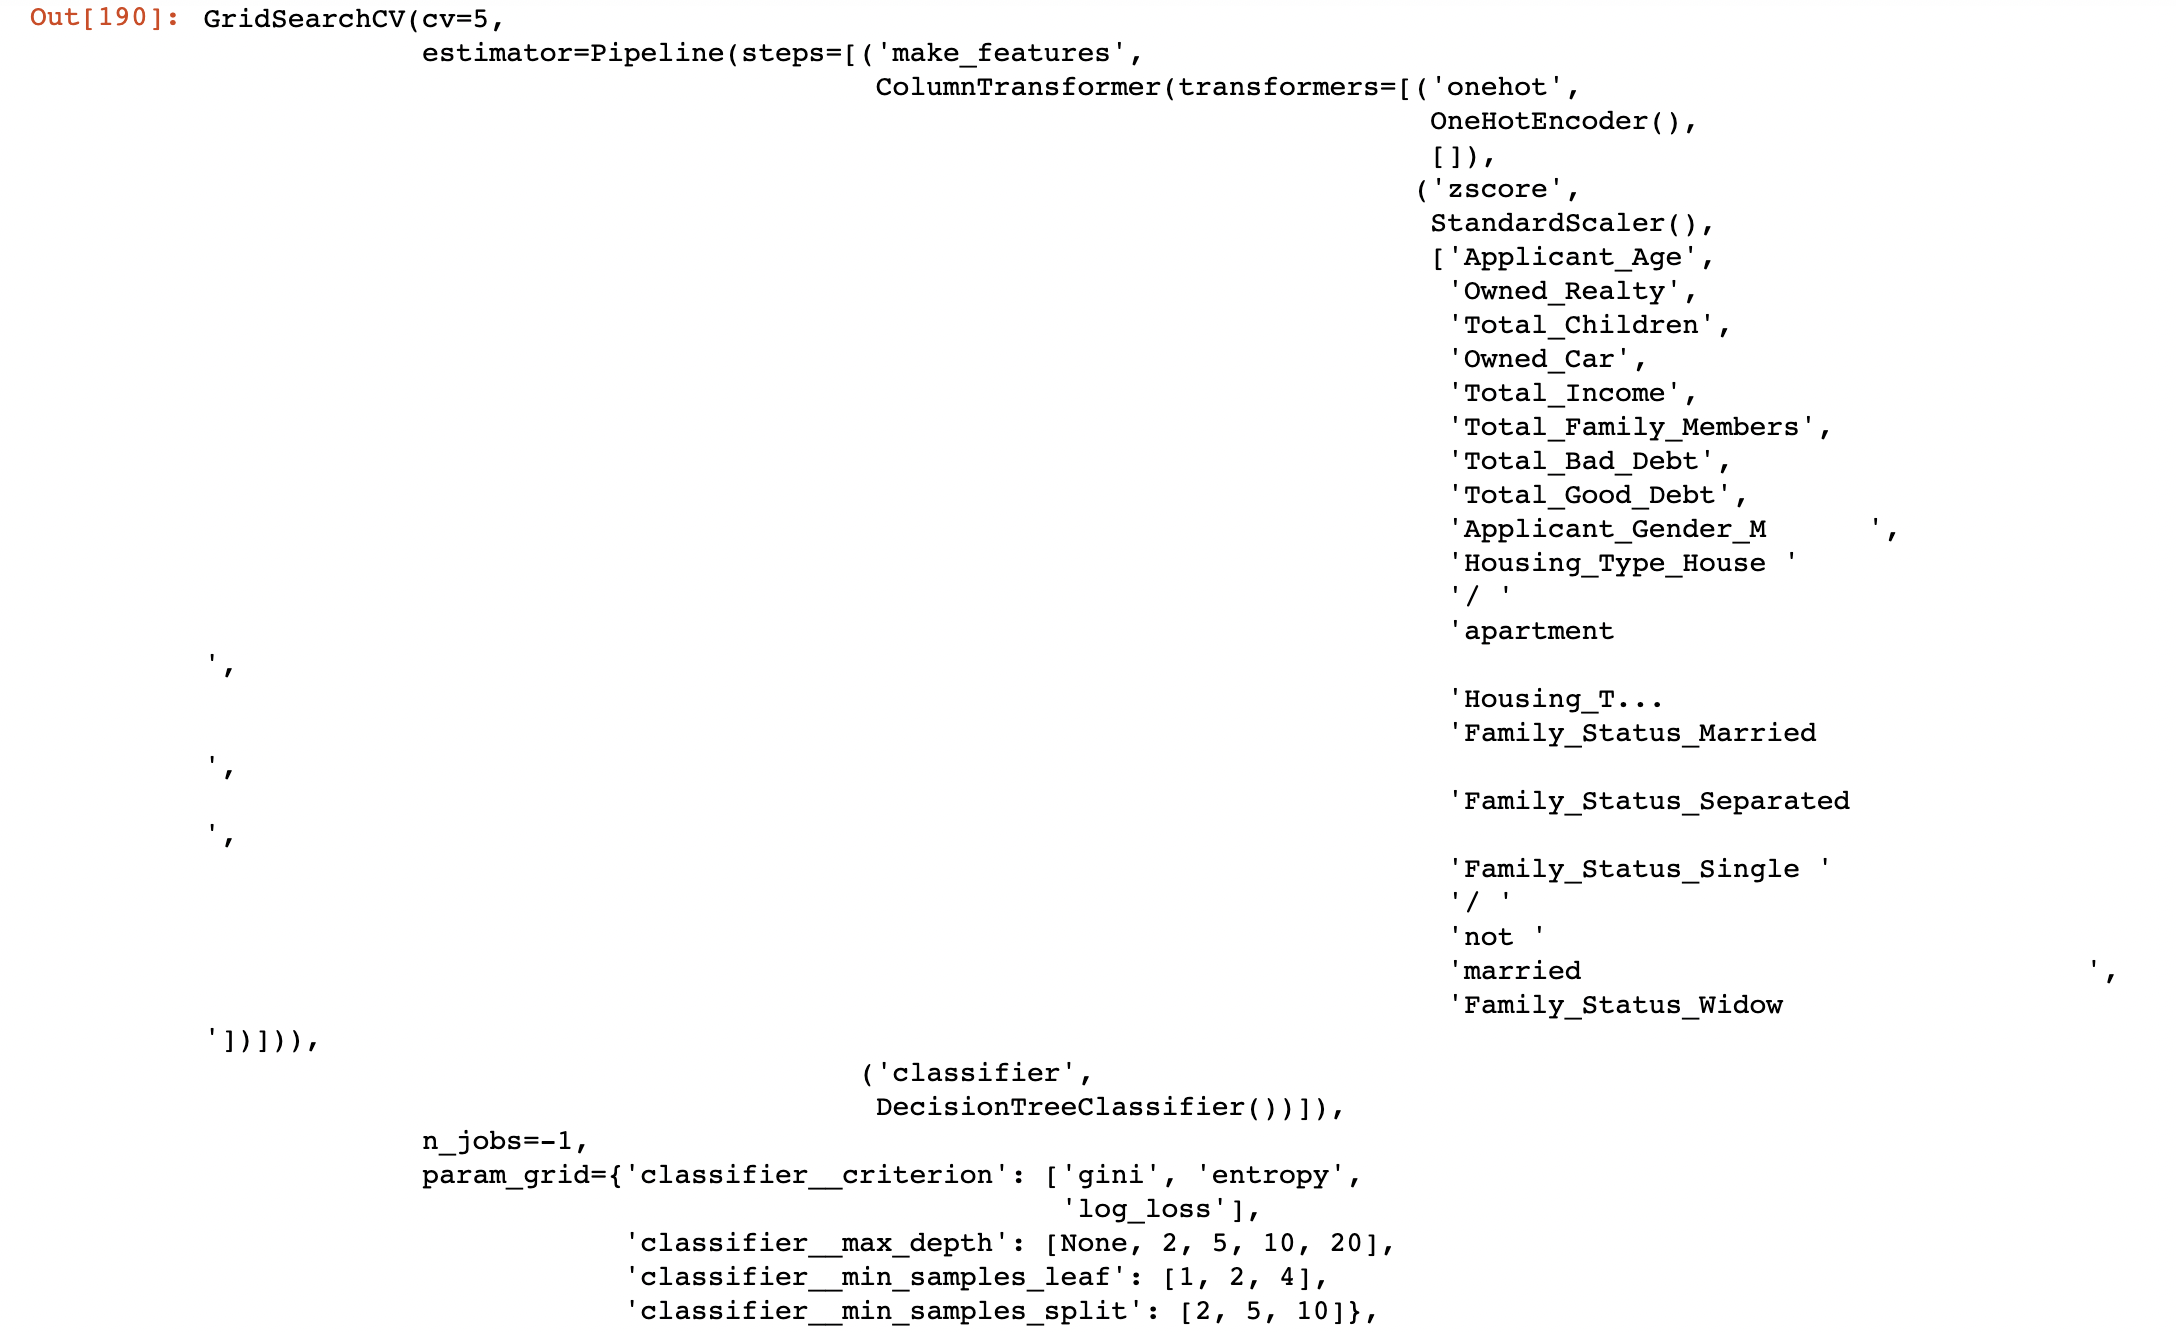

The gridsearch gave us the resulting best model with the following paramters

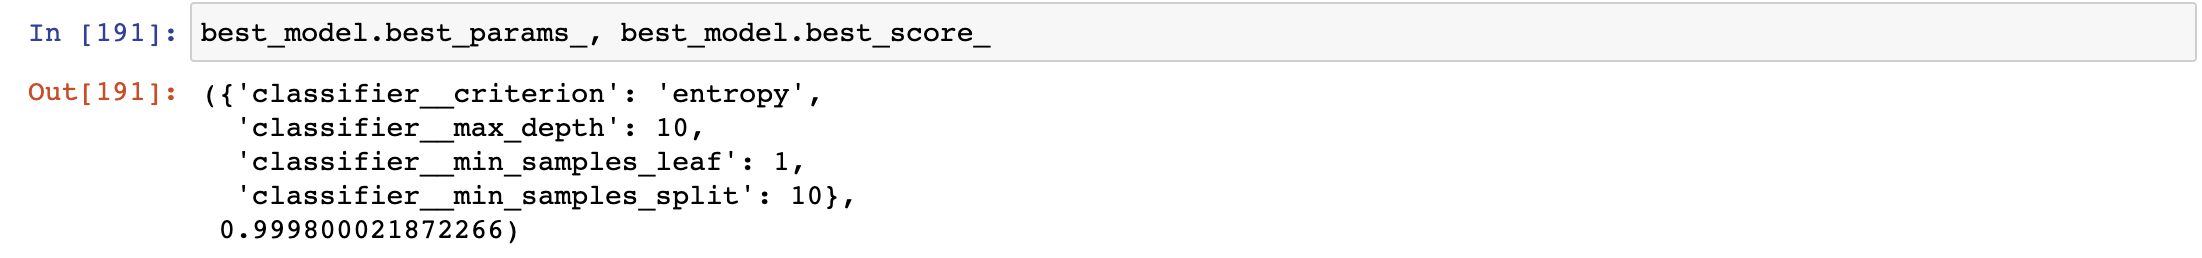

In [30]:
#Best decision tree model and its accuracy score
model = DecisionTreeClassifier(criterion= 'entropy',max_depth=10,min_samples_leaf=1,min_samples_split=10).fit(X_res,y_res)
model.score(X_test_df,y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


0.9984082769598089

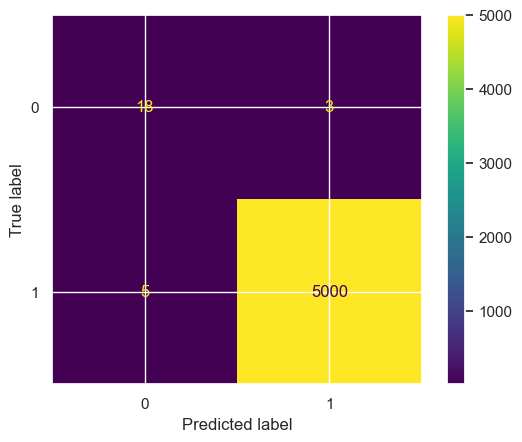

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_test = model.predict(X_test_processed)
#print(len(y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)

# the text version takes the true labels 
# and the predictions AND THE ORDER OF ARGUMENTS MATTERS!!
# don't mess it up

disp = ConfusionMatrixDisplay(cm);
disp.plot()

In [32]:
# hint use classifier_model.decision_function(X_test_bcw) to get prediction scores
scores = model.predict_proba(X_test_processed)[:,1]
print(scores)
fps = []
tps = []
for threshold in np.linspace(0,1,1000):
    y_pred = scores > threshold
    #true_positives, false_positives, true_negatives, false_negatives = classifier_model.decision_function(y_pred)
    
    #x = classifier_model.decision_function(y_pred)
    # Step 1: Compute the confusion matrix
    (true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_test, y_pred).ravel()
    
    #(true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_train_bcw, y_pred).ravel()
    # Step 2: Compute the TP and FP 
    # and append it to fps and tps
    fps.append((false_positives)/(false_positives + true_negatives))
    tps.append((true_positives)/(true_positives + false_negatives))

[1. 1. 1. ... 1. 1. 1.]


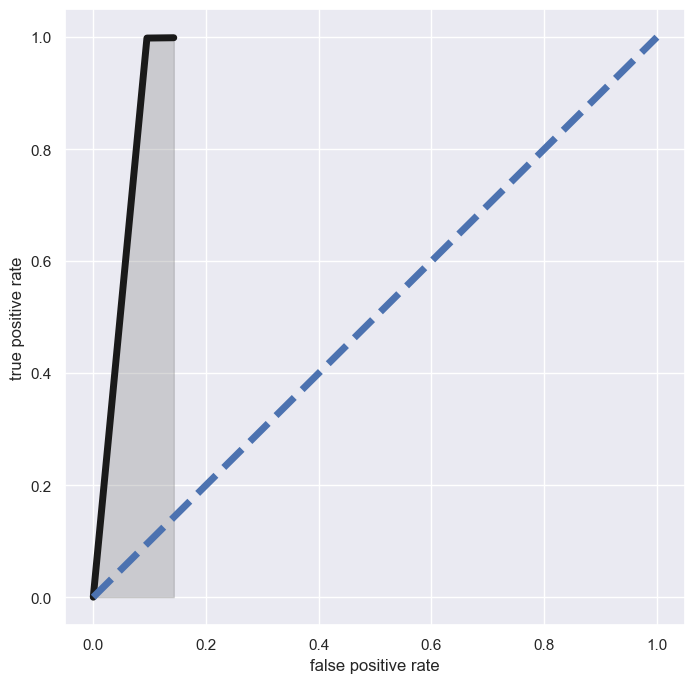

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");

### Classifier 6 - Ensemble (AdaBoost)

Ensemble Adaboost combines multiple weak classifiers to create a strong classifier, making it a interesting alogorithm which is usually accurate. The algorithm iteratively trains the weak classifiers on the misclassified samples from the previous iteration, assigning higher weights to the misclassified samples to ensure their correct classification in subsequent iterations.

For Adaboost we gridsearched over number of esitmators, learning rate, and algorithms as seen below.

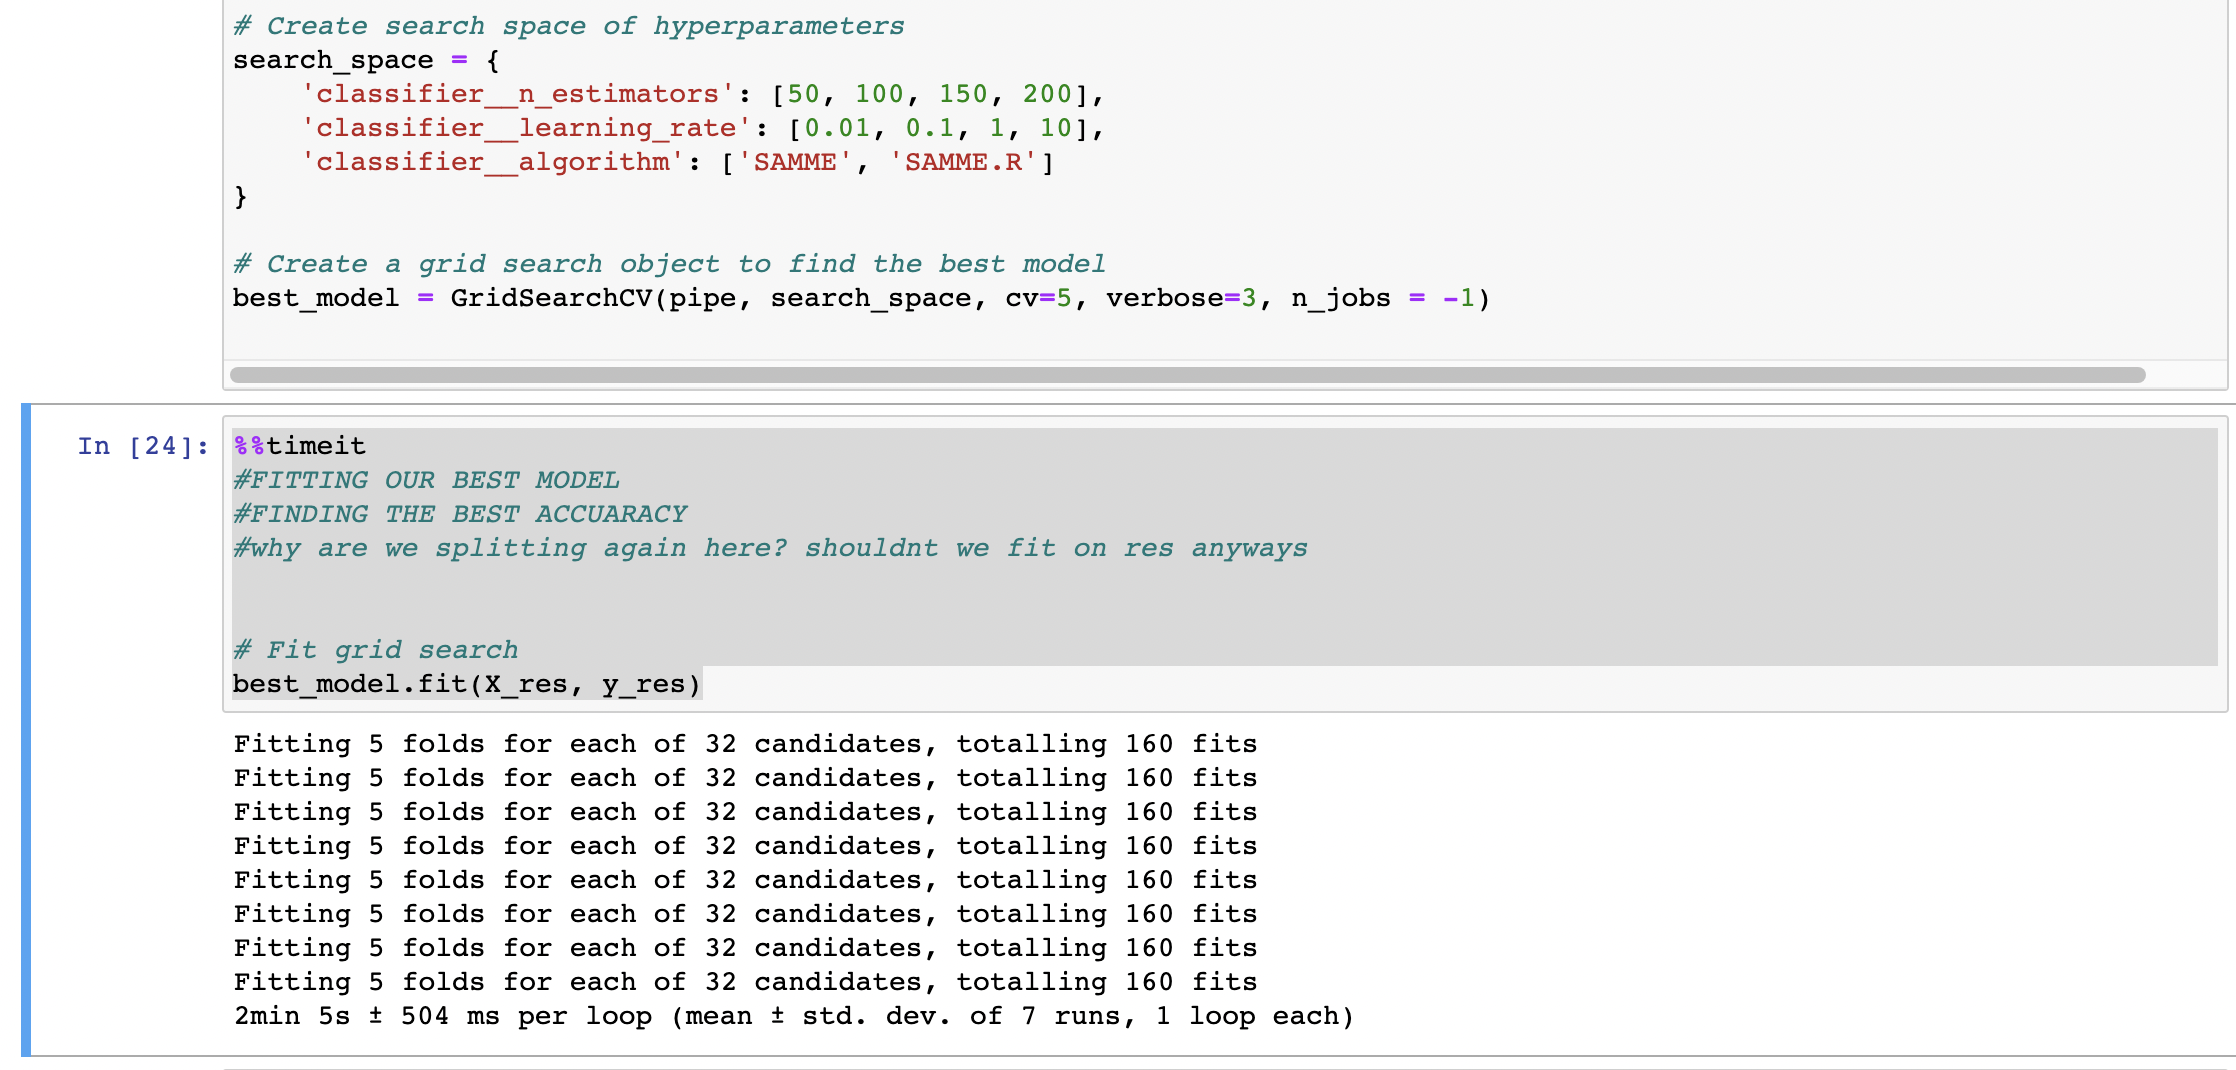

The gridsearch gave us the best model with the following parameters

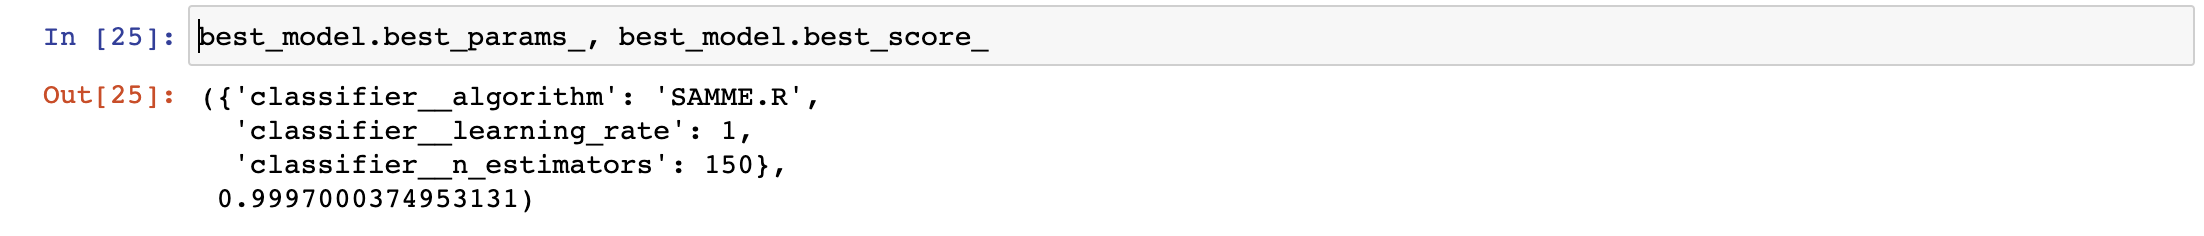

In [34]:
#Best AdaBoost model and its accuracy score
from sklearn.ensemble import AdaBoostClassifier #best model of adaboost from the classifiers
model = AdaBoostClassifier(algorithm = 'SAMME.R',learning_rate=1,n_estimators=150).fit(X_res,y_res)
model.score(X_test_df,y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but AdaBoostClassifier was fitted without feature names
  warnings.warn(


0.9982093115797851

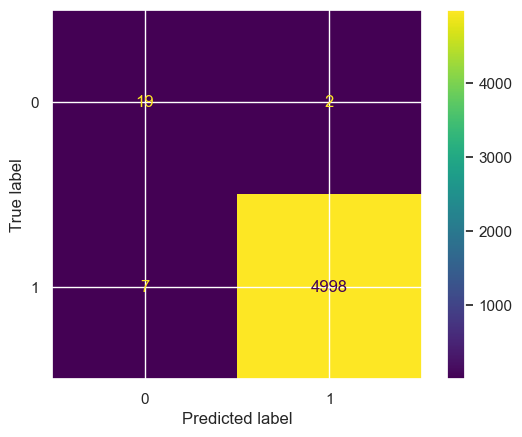

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_test = model.predict(X_test_processed)
#print(len(y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)

# the text version takes the true labels 
# and the predictions AND THE ORDER OF ARGUMENTS MATTERS!!
# don't mess it up

disp = ConfusionMatrixDisplay(cm);
disp.plot()

In [36]:
# hint use classifier_model.decision_function(X_test_bcw) to get prediction scores
scores = model.predict_proba(X_test_processed)[:,1]
print(scores)
fps = []
tps = []
for threshold in np.linspace(0,1,1000):
    y_pred = scores > threshold
    #true_positives, false_positives, true_negatives, false_negatives = classifier_model.decision_function(y_pred)
    
    #x = classifier_model.decision_function(y_pred)
    # Step 1: Compute the confusion matrix
    (true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_test, y_pred).ravel()
    
    #(true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_train_bcw, y_pred).ravel()
    # Step 2: Compute the TP and FP 
    # and append it to fps and tps
    fps.append((false_positives)/(false_positives + true_negatives))
    tps.append((true_positives)/(true_positives + false_negatives))

[0.76717319 0.76753209 0.76432833 ... 0.5758769  0.67566557 0.68944165]


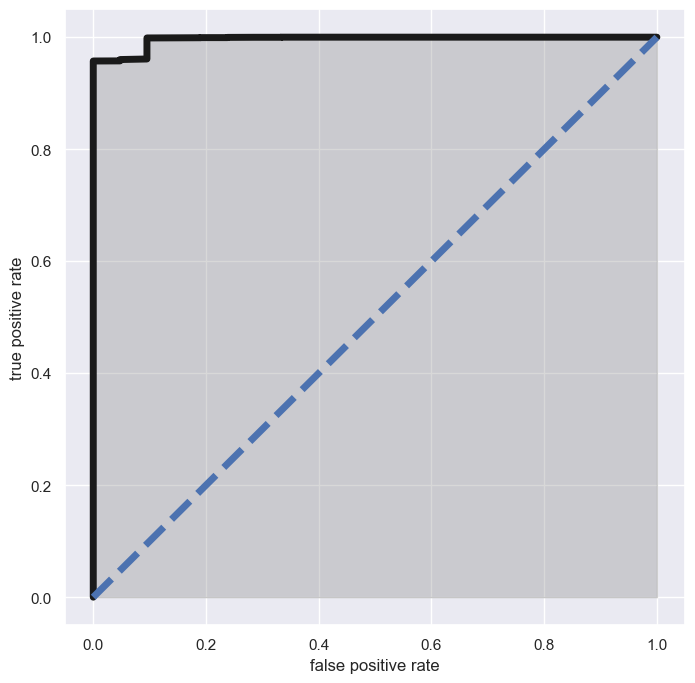

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");

### Classifier 7 - Ensemble (Gradient tree boosting)

Ensemble Gradient Tree Boosting combines multiple decision trees to create a strong classifier. The algorithm trains each tree sequentially, using the errors of the previous tree to improve the performance of the next tree, and then aggregates their predictions to make the final classification.


We gridsearch over number of estimators, learning rate, maximum depth, minimum splits, minimum leaves, and maximum features to find the best model.

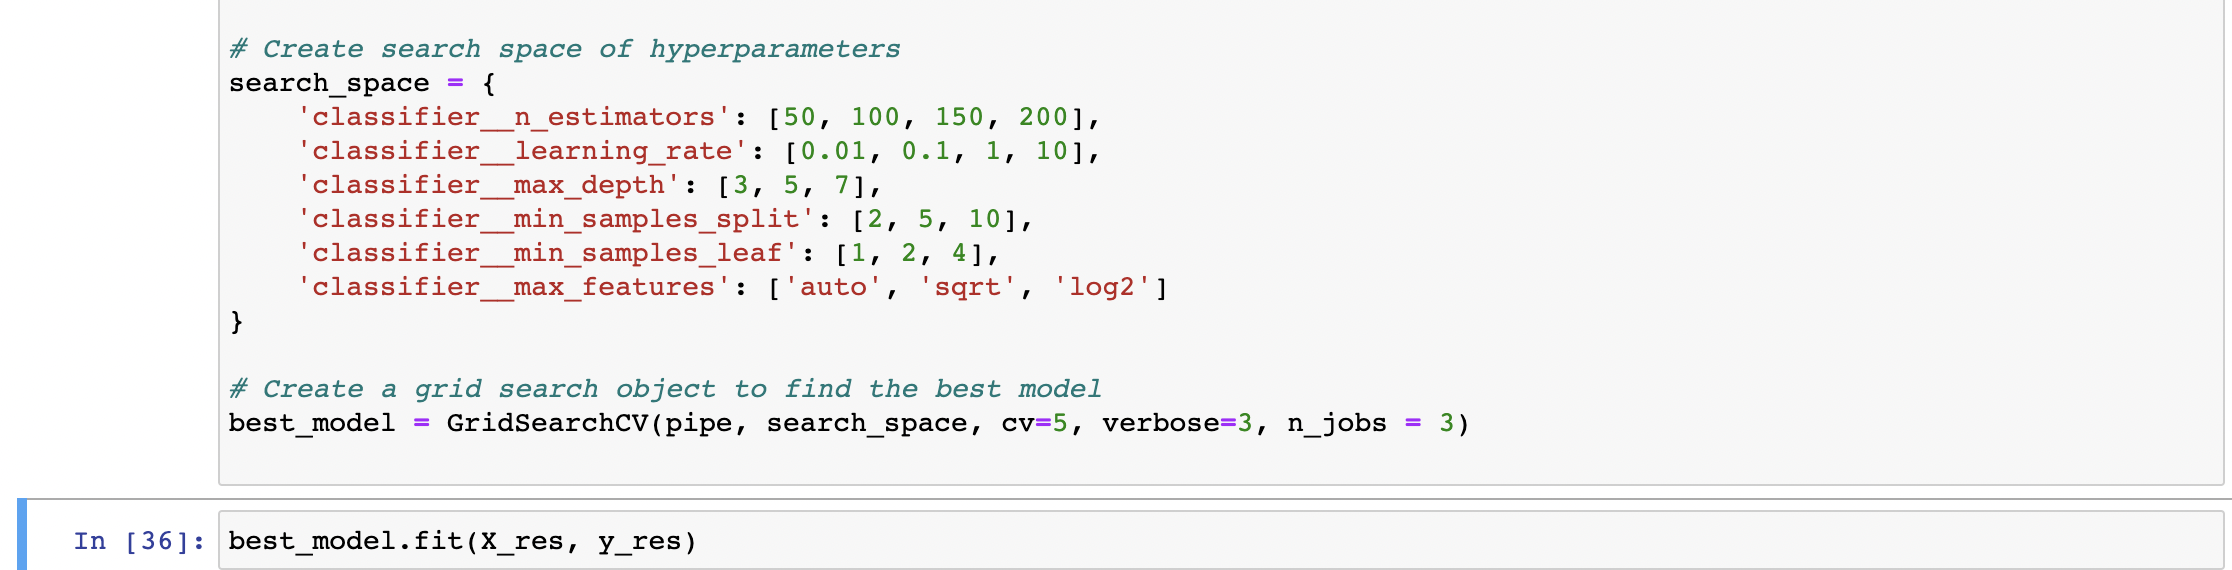

The following gradient boosting tree is the best model. 

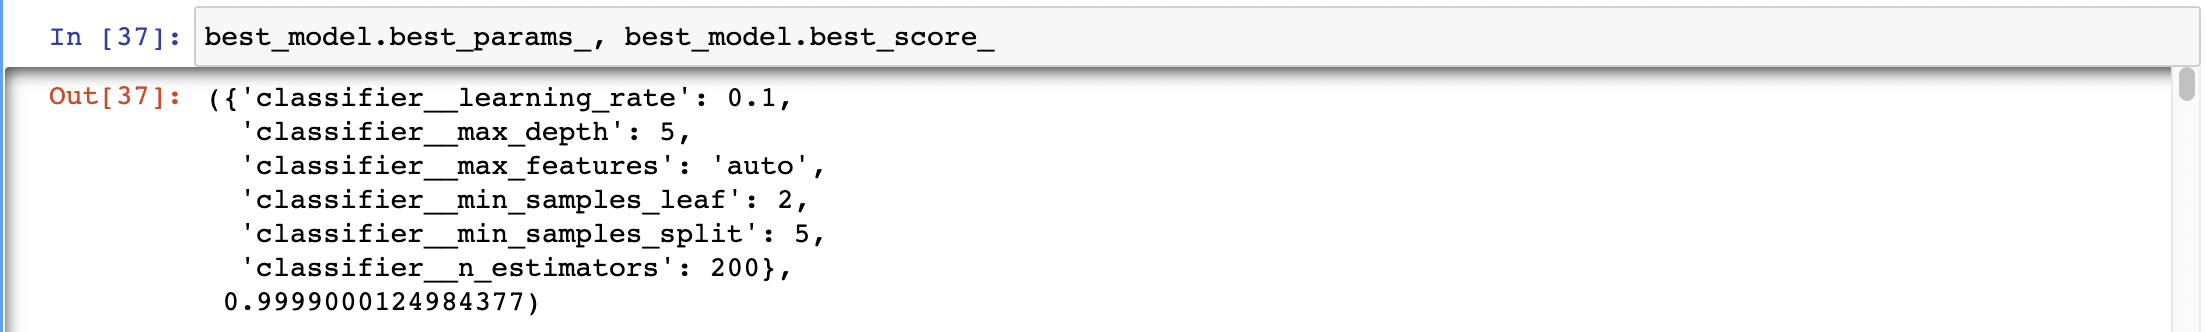

In [38]:
#Best model and its accuracy 
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate =0.1,max_depth=5,max_features='auto',min_samples_leaf=2,min_samples_split=5,n_estimators=200).fit(X_res,y_res)
model.score(X_test_df,y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


0.9984082769598089

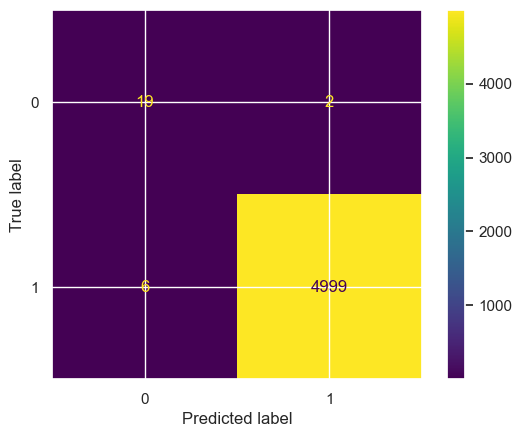

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_test = model.predict(X_test_processed)
#print(len(y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)

# the text version takes the true labels 
# and the predictions AND THE ORDER OF ARGUMENTS MATTERS!!
# don't mess it up

disp = ConfusionMatrixDisplay(cm);
disp.plot()

In [40]:
# hint use classifier_model.decision_function(X_test_bcw) to get prediction scores
scores = model.predict_proba(X_test_processed)[:,1]
print(scores)
fps = []
tps = []
for threshold in np.linspace(0,1,1000):
    y_pred = scores > threshold
    #true_positives, false_positives, true_negatives, false_negatives = classifier_model.decision_function(y_pred)
    
    #x = classifier_model.decision_function(y_pred)
    # Step 1: Compute the confusion matrix
    (true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_test, y_pred).ravel()
    
    #(true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_train_bcw, y_pred).ravel()
    # Step 2: Compute the TP and FP 
    # and append it to fps and tps
    fps.append((false_positives)/(false_positives + true_negatives))
    tps.append((true_positives)/(true_positives + false_negatives))

[0.99999999 1.         0.99999999 ... 0.99999993 1.         0.99999999]


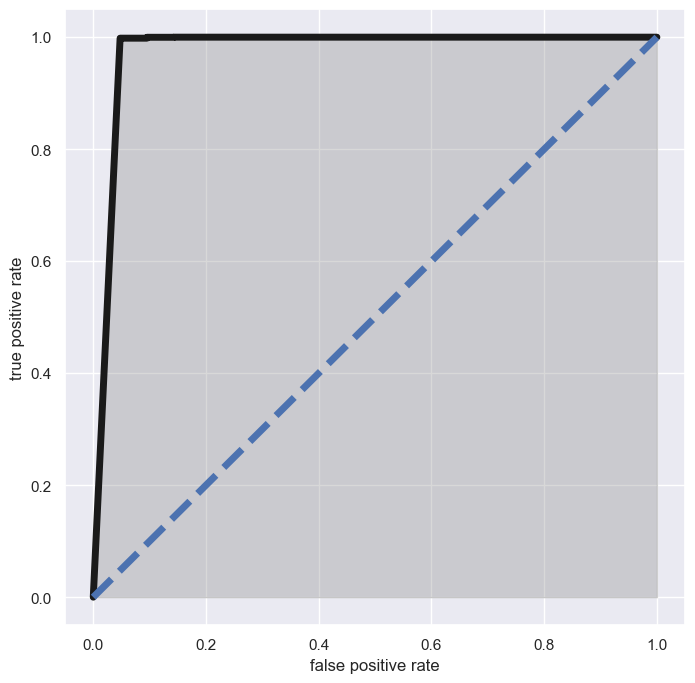

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");

### Classifier 8 - Random Forest

Random Forest creates an ensemble of decision trees by randomly selecting subsets of features and samples. The algorithm aggregates the predictions of the individual trees to make a final classification, resulting in a robust and accurate classifier that is less prone to overfitting.

We gridsearched over number of estimators, decision criterion, maximum depth, minimum splits, minimum leaves, and maximum features to find the best model.

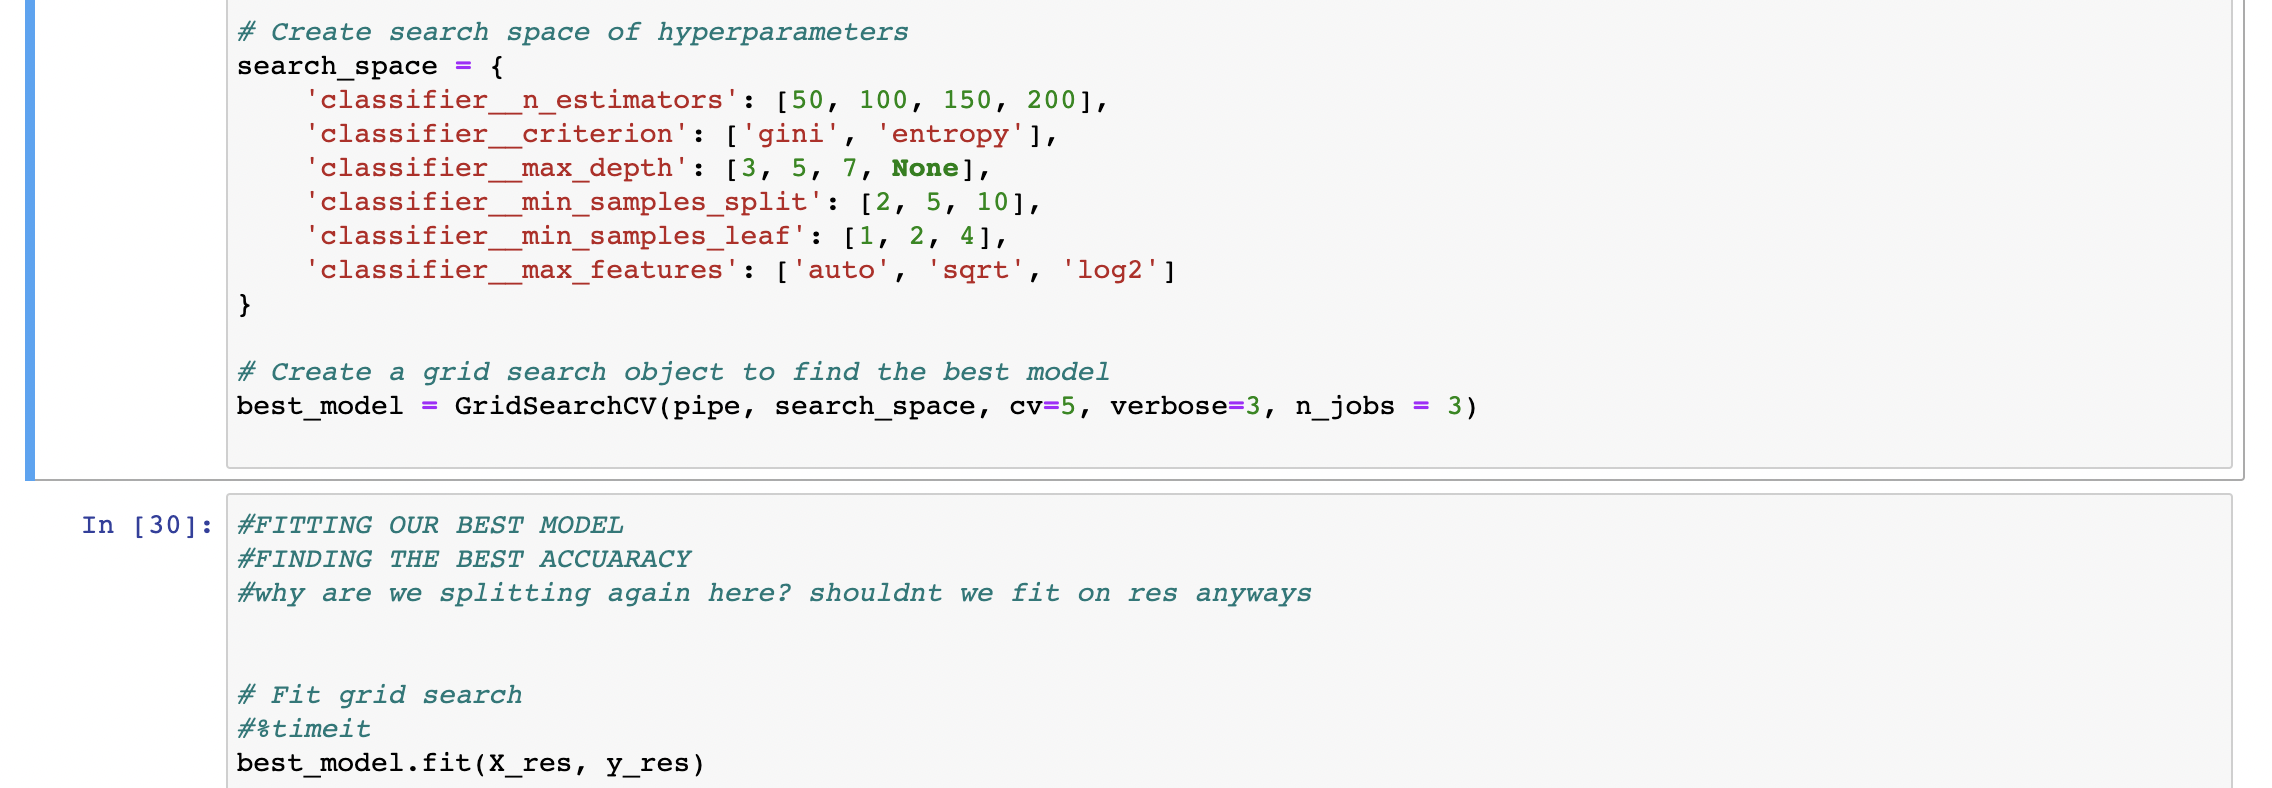

The following is the model that the gridserach deemed as the best model

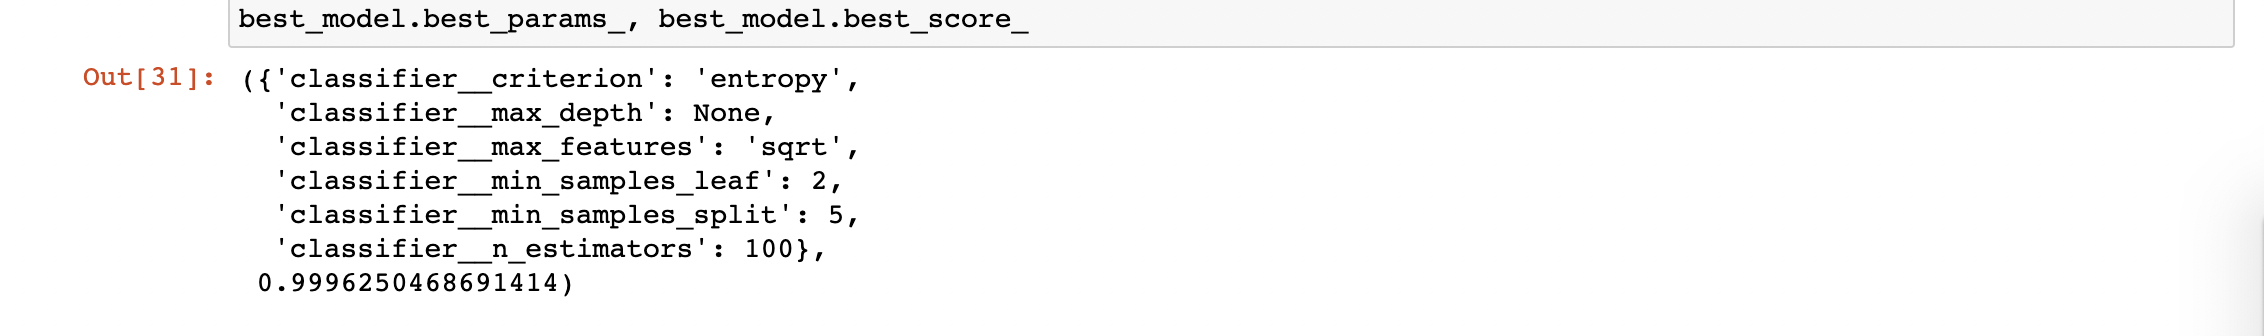

In [42]:
#Best model and its accuracy
from sklearn.metrics import precision_score
model = RandomForestClassifier(criterion='entropy',max_depth=None,max_features='sqrt',min_samples_leaf=2,min_samples_split=5,n_estimators=100).fit(X_res,y_res)
model.score(X_test_df,y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.9976124154397135

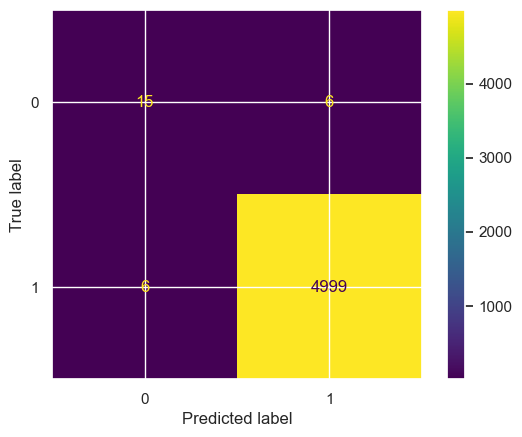

In [43]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred_test = model.predict(X_test_processed)
#print(len(y_pred_test))
cm = confusion_matrix(y_test, y_pred_test)

# the text version takes the true labels 
# and the predictions AND THE ORDER OF ARGUMENTS MATTERS!!
# don't mess it up

disp = ConfusionMatrixDisplay(cm);
disp.plot()

In [44]:
# hint use classifier_model.decision_function(X_test_bcw) to get prediction scores
scores = model.predict_proba(X_test_processed)[:,1]
print(scores)
fps = []
tps = []
for threshold in np.linspace(0,1,1000):
    y_pred = scores > threshold
    #true_positives, false_positives, true_negatives, false_negatives = classifier_model.decision_function(y_pred)
    
    #x = classifier_model.decision_function(y_pred)
    # Step 1: Compute the confusion matrix
    (true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_test, y_pred).ravel()
    
    #(true_negatives, false_positives, false_negatives, true_positives) = confusion_matrix(y_train_bcw, y_pred).ravel()
    # Step 2: Compute the TP and FP 
    # and append it to fps and tps
    fps.append((false_positives)/(false_positives + true_negatives))
    tps.append((true_positives)/(true_positives + false_negatives))

[0.98 0.97 0.99 ... 0.94 1.   0.96]


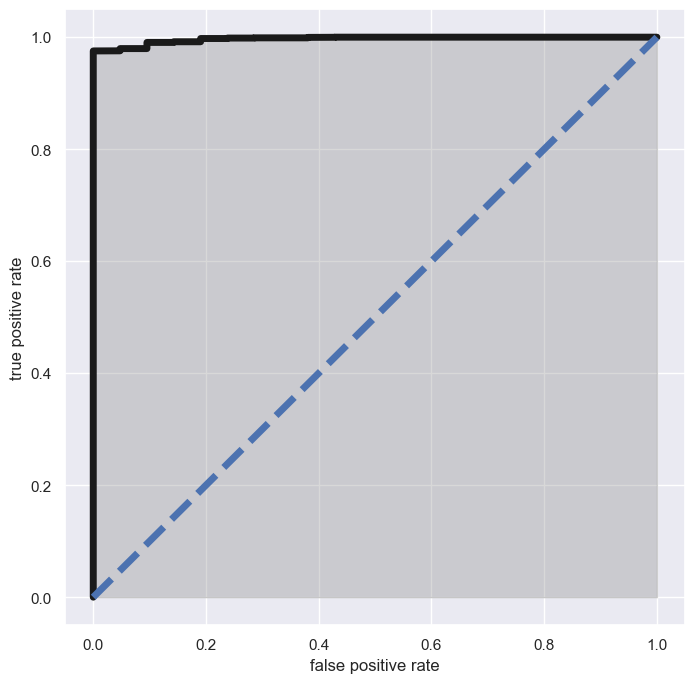

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");

# Discussion

### Interpreting the result

Analyzing the accuracy scores of each model, we see a close too 99% accuracy on almost all of them (except Naive Bayes). This shows us that by optimizing the hyperparameters, most models prove to be quite accurate in their predictions. Having 99% accuracy on our models shows that possibilty of approving credit cards and hence determining credit worthiness can be done pretty well by an unbiased entity such as a machine learning problem. 

Since the accuracies of most of the models are pretty similar, it is difficult to label one as the best model. The training of this model shows us how working with even limited resources with small datsets and restricted computational power can create good predictive models. This goes to show that machien learning can be used to automate even menial tasks and create good models for the world around us.


### Limitations

There are a few limitations with our work. First, we had a smaller dataset. Having a larger dataset would have allowed more accurate results and better predictions and given us more variation in the data. Also, the data was only from one credit card company, which gives a bias toward one set of policies for credit card approval. If we had credit card data from other companies, we would be able to see if our predictions are true across the credit card industry for all companies. Additionally, we had computational limitiations therefore we were not able to run kernel ridge and possibly other computationally intensive models. Another limitation is that here may be other variables that we did not consider, such as demographics, that could also affect credit card approval rates. Including more variables in our analysis could provide a better credit card approval process model.

### Ethics & Privacy

We referenced the ethics checklist at https://deon.drivendata.org. We have no knowledge of the data collection process since we are using a publicly available dataset at Kaggle, however, we do know that no names are part of the dataset since each applicant was identified by their ID which protects them. One of the ethical issues with this data is that some information such as the name and date of birth can be identifiable,even though this data set has omitted such private information by using unidentifiable id numbers and age instead of the date of birth.  We haven’t gotten towards the modeling or the deployment therefore we can’t answer the ethics of these two yet. However, basing off of our base model we see that false negatives are a large ethical concern for us as many individuals are considered ineligible by just comparing income. Making our model robust with other economic and credit-worthy factors such as car and home ownership as well as number of family members can help predict individuals who can pay off credit debt more accurately. This ethical corncern will get addressed once a more robust and complex model is in place which takes many factors into account. We will continue to monitor this concern within our model by tracking false positivity rates more closely. Additionally, one confounding variable that could impact our data is race. This variable could possibly be biasing our data, however this variable is not tracked within our dataset hence it is difficult to evaluate whether it is biasing our data and hence biaisng our model. This can be resolved if our model is implemented and trained on data which tracks racial characteristics to further understand the bias.


### Conclusion

Our project goes to show that credit card approvals and other classification processes can be automated to further reduce human effort and bias. Although there are variables that we haven't considered in our model, the work that we have doen shows a first step into the various ways Machine Learning models can be utilized. For further research, we could take into account demographic variables to see if they impact credit card approval decisions. Doing this will allow of us determine possible biases within the approval process and correct them.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Hemkiran, S., et al. “Design of Automatic Credit Card Approval System Using Machine Learning.” SpringerLink, Springer Singapore, 1 Jan. 1970, https://link.springer.com/chapter/10.1007/978-981-16-6448-9_1. <br> 
<a name="admonishnote"></a>2.[^](#admonish): Kibria, Golam, and Mehmet Sevkli. “Application of Deep Learning for Credit Card Approval: A Comparison ...” Application of Deep Learning for Credit Card Approval: A Comparison with Two Machine Learning Techniques, https://www.researchgate.net/profile/Md-Kibria-12/publication/348755769_Application_of_Deep_Learning_for_Credit_Card_Approval_A_Comparison_with_Two_Machine_Learning_Techniques/links/600f495f92851c13fe39bb38/Application-of-Deep-Learning-for-Credit-Card-Approval-A-Comparison-with-Two-Machine-Learning-Techniques.pdf?origin=publication_detail. <br>
<a name="sotanote"></a>3.[^](#sota):Markova, Maya. “Credit Card Approval Model: An Application of Deep Neural Networks.” AIP Publishing, AIP Publishing LLC AIP Publishing, 24 Feb. 2021, https://aip.scitation.org/doi/abs/10.1063/5.0040744?journalCode=apc. 
